# Threshold Manipulation
It should be the last step in Model Building Process

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append('../')

from pragmaticml import confusion_matrix

In [3]:
%matplotlib inline
sns.set()

In [4]:
pima_df = pd.read_csv('../data/pima.csv', dtype = {'diabetes': 'int8'})
pima_df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1


In [5]:
feature_cols = ['num_preg', 'insulin', 'bmi', 'age']
X = pima_df[feature_cols]
y = pima_df.diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Threshold - 0.5
If probability exceeds the default threshold i.e. 0.5  
Then output 1 as class, else 0

In [6]:
y_pred_prob = logreg.predict_proba(X_test)    # It has 2 columns, for each class
y_pred_prob[:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [7]:
initial_y_pred = logreg.predict(X_test)
initial_y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int8)

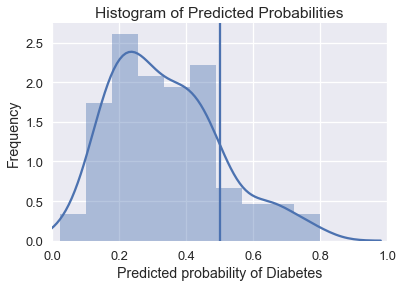

In [8]:
def plot_prob_threshold(x = 0.5):
    sns.set_context('talk')
    sns.distplot(y_pred_prob[:, 1])
    plt.xlim([0.0, 1.0])
    plt.title('Histogram of Predicted Probabilities')
    plt.xlabel('Predicted probability of Diabetes')
    plt.ylabel('Frequency')
    plt.axvline(x = x)    # This line depicts the current threshold
    plt.show()
    
plot_prob_threshold()

# Decrease the Threshold
It'll increase the sensitivity of the Classifier

In [9]:
from sklearn.preprocessing import binarize

new_y_pred = binarize(y_pred_prob, 0.3).astype('int8')[:, 1]    # Binarize goes through element, only letting element above 0.3

# Threshold - 0.3
If probability exceeds the default threshold i.e. 0.3  
Then output 1 as class, else 0

In [10]:
y_pred_prob[:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [11]:
new_y_pred[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int8)

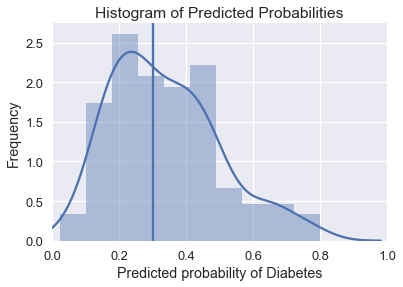

In [12]:
plot_prob_threshold(x = 0.3)

# Comparisons

In [13]:
confusion_matrix.show(y_test, initial_y_pred)

,0,1
0,118,12
1,47,15


In [14]:
confusion_matrix.show(y_test, new_y_pred)

,0,1
0,80,50
1,16,46


### Recall or Sensitivity has increased significantly
While Specifity Decreased

In [15]:
confusion_matrix.describe(y_test, initial_y_pred)

,TP,TN,FN,FP,Recall,Specificity,Precision
0,118,15,12,47,0.907692,0.241935,0.715152
1,15,118,47,12,0.241935,0.907692,0.555556


In [16]:
confusion_matrix.describe(y_test, new_y_pred)

,TP,TN,FN,FP,Recall,Specificity,Precision
0,80,46,50,16,0.615385,0.741935,0.833333
1,46,80,16,50,0.741935,0.615385,0.479167


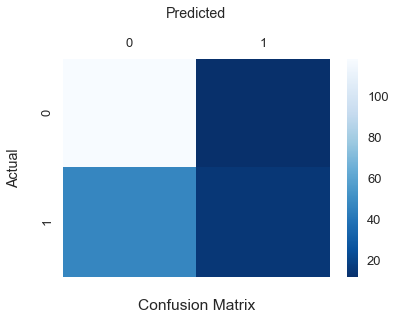

In [17]:
confusion_matrix.visualize(y_test, initial_y_pred)

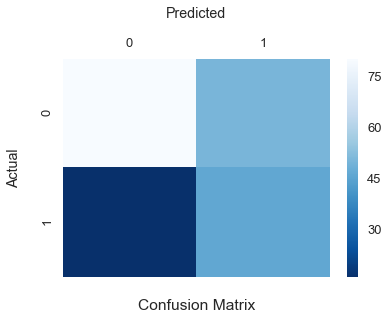

In [18]:
confusion_matrix.visualize(y_test, new_y_pred)

In [19]:
metrics.accuracy_score(y_test, initial_y_pred)

0.69270833333333337

In [20]:
metrics.accuracy_score(y_test, new_y_pred)

0.65625

# Conclusion
> Although Sensitivity increased Accuracy Score plummeted